In [1]:
import pandas as pd 
from sklearn.datasets import load_iris 
iris= load_iris()

In [3]:
iris.feature_names 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names  

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['target']=iris.target

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [15]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [25]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]
df0['sepal length (cm)']

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal length (cm), dtype: float64

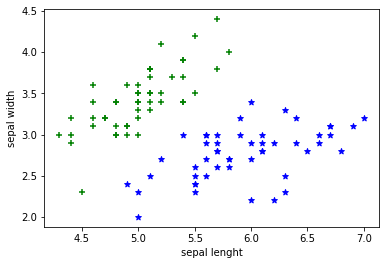

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("sepal lenght")
plt.ylabel("sepal width")
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="green",marker="+")
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="blue",marker="*")

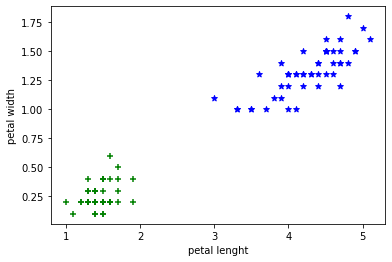

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("petal lenght")
plt.ylabel("petal width")
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color="green",marker="+")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="blue",marker="*")


In [40]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])

In [41]:
from sklearn.model_selection import train_test_split
X=df.drop(['target','flower_name'],axis='columns')
y=df.target

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [43]:
len(x_train)

120

In [44]:
len(x_test)

30

In [45]:
from sklearn.neighbors import KNeighborsClassifier 

In [50]:
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)


0.9666666666666667

In [52]:
from sklearn.metrics  import confusion_matrix

In [53]:
y_pred=knn.predict(x_test)

In [54]:
cm=confusion_matrix(y_test,y_pred)

In [55]:
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [56]:
%matplotlib inline
import seaborn as sns 
plt.figure (figsize=(7,5))

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

Text(33.0, 0.5, 'truth')

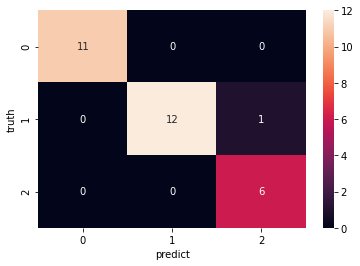

In [58]:
sns.heatmap(cm,annot=True)
plt.xlabel('predict')
plt.ylabel('truth')

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
knn.predict(df.iloc[1,:])